In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the liver patients dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/Liver Disease Prediction/Dataset/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# Select the relevant features
features = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

# Filter the dataset
data = data[features]


In [3]:
# Convert Gender to numeric
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 0, 'Female': 1})

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and data types
print(data.info())

# Drop rows with missing values
data = data.dropna()

# Display the first few rows of the dataset
print(data.head())

# Check for missing values and data types
print(data.info())

data=data.drop_duplicates()
print(data.info())

# Separate features (X) and target (y)
X = data.drop('Result', axis=1)
y = data['Result']


   Age of the patient  Gender of the patient  Total Bilirubin  \
0                65.0                    1.0              0.7   
1                62.0                    0.0             10.9   
2                62.0                    0.0              7.3   
3                58.0                    0.0              1.0   
4                72.0                    0.0              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3   

In [4]:
# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Liver Disease'] = y


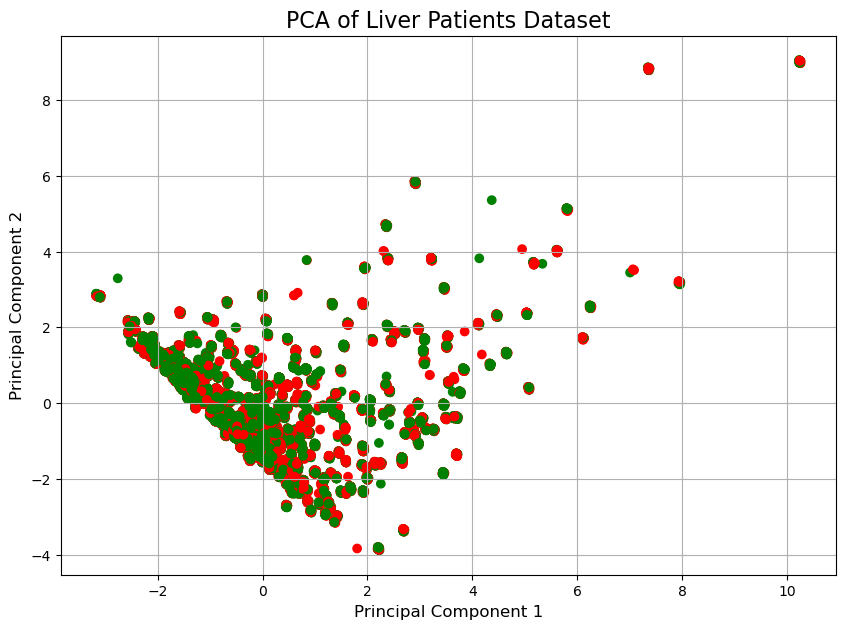

In [6]:
# Visualize PCA Results
# Assign colors based on the target variable
colors = np.where(pca_df['Liver Disease'] == 1, 'red', 'green')

# Plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(
    pca_df['Principal Component 1'], 
    pca_df['Principal Component 2'], 
    c=colors, 
    alpha=1
)
plt.title('PCA of Liver Patients Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid()
plt.show()


In [7]:
# Evaluate Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Cumulative Variance Explained: {np.cumsum(explained_variance)}")


Explained Variance Ratio: [0.27060716 0.19190276]
Cumulative Variance Explained: [0.27060716 0.46250992]


In [8]:
# Analyze the Most Significant Features
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)


                                           PC1       PC2
Age of the patient                    0.008213 -0.007792
Gender of the patient                -0.000893 -0.024030
Total Bilirubin                       0.441942  0.224196
Direct Bilirubin                      0.445111  0.232110
 Alkphos Alkaline Phosphotase         0.251765  0.034425
 Sgpt Alamine Aminotransferase        0.289050  0.393376
Sgot Aspartate Aminotransferase       0.324649  0.375707
Total Protiens                       -0.250814  0.479044
 ALB Albumin                         -0.414731  0.497207
A/G Ratio Albumin and Globulin Ratio -0.345331  0.348481


<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  float64
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(10), int6

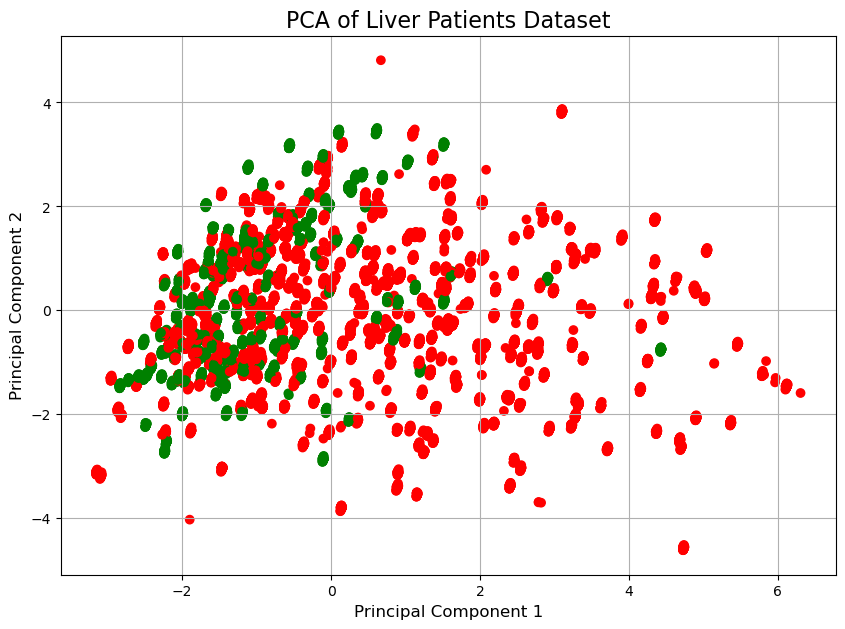

Explained Variance Ratio: [0.33910863 0.19677902]
Cumulative Variance Explained: [0.33910863 0.53588765]
Feature Contributions to Principal Components:
                                           PC1       PC2
Age of the patient                    0.005958  0.019241
Gender of the patient                -0.001861  0.021066
Total Bilirubin                       0.453835 -0.142652
Direct Bilirubin                      0.449210 -0.146761
 Alkphos Alkaline Phosphotase         0.287075 -0.151396
 Sgpt Alamine Aminotransferase        0.331027 -0.360454
Sgot Aspartate Aminotransferase       0.387065 -0.283146
Total Protiens                       -0.193963 -0.529595
 ALB Albumin                         -0.325191 -0.559489
A/G Ratio Albumin and Globulin Ratio -0.327145 -0.361633


In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Load the liver patients dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/Liver Disease Prediction/Dataset/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# Select the relevant features
features = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

# Filter the dataset
data = data[features]

# Convert categorical Gender to numeric
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 0, 'Female': 1})

# Drop rows with missing values
data = data.dropna()

data=data.drop_duplicates()
print(data.info())

# Separate features (X) and target (y)
X = data.drop('Result', axis=1)
y = data['Result']

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Handle Outliers using Z-Scores
z_scores = np.abs(zscore(X))
X_no_outliers = X[(z_scores < 3).all(axis=1)]
y_no_outliers = y[(z_scores < 3).all(axis=1)]

# Step 3: Normalize Skewed Features
# Identify skewed features
skewed_features = X_no_outliers.columns[X_no_outliers.skew() > 1]
print("Skewed Features:", skewed_features)

# Apply log transformation to skewed features
for feature in skewed_features:
    X_no_outliers.loc[:, feature] = np.log1p(X_no_outliers[feature])

# Standardize again after handling outliers and skewness
X_preprocessed = scaler.fit_transform(X_no_outliers)

# Step 4: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Liver Disease'] = y_no_outliers.values

# Step 5: Visualize PCA Results
colors = np.where(pca_df['Liver Disease'] == 1, 'red', 'green')

plt.figure(figsize=(10, 7))
plt.scatter(
    pca_df['Principal Component 1'], 
    pca_df['Principal Component 2'], 
    c=colors, 
    alpha=1
)
plt.title('PCA of Liver Patients Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid()
plt.show()

# Step 6: Evaluate Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Explained Variance Ratio: {explained_variance}")
print(f"Cumulative Variance Explained: {cumulative_variance}")

# Step 7: Analyze the Most Significant Features
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_no_outliers.columns)
print("Feature Contributions to Principal Components:")
print(loadings)


<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  float64
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(10), int6

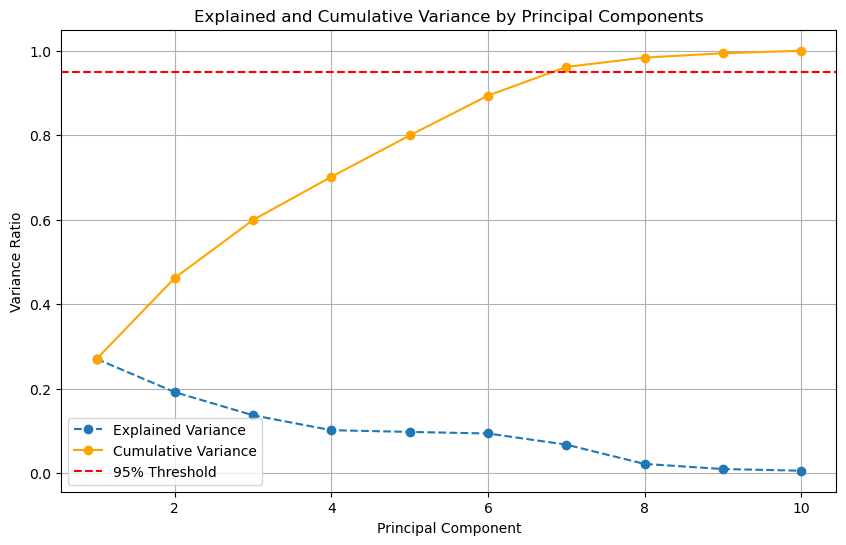

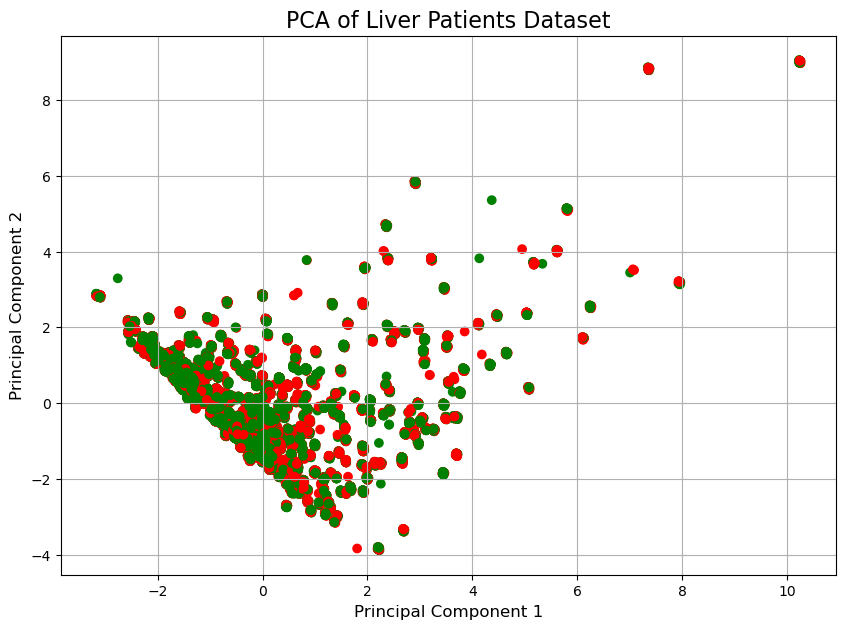

Feature Contributions to Principal Components:
                                           PC1       PC2       PC3       PC4  \
Age of the patient                    0.008213 -0.007792  0.034608 -0.705837   
Gender of the patient                -0.000893 -0.024030  0.019253  0.704854   
Total Bilirubin                       0.441942  0.224196 -0.447268 -0.015745   
Direct Bilirubin                      0.445111  0.232110 -0.439989 -0.011167   
 Alkphos Alkaline Phosphotase         0.251765  0.034425 -0.074702  0.062765   
 Sgpt Alamine Aminotransferase        0.289050  0.393376  0.516322  0.007671   
Sgot Aspartate Aminotransferase       0.324649  0.375707  0.485738  0.011819   
Total Protiens                       -0.250814  0.479044 -0.288420  0.016907   
 ALB Albumin                         -0.414731  0.497207 -0.110039  0.007467   
A/G Ratio Albumin and Globulin Ratio -0.345331  0.348481  0.037248 -0.011110   

                                           PC5       PC6       PC7  
Age

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/Liver Disease Prediction/Dataset/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# Select the relevant features
features = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

data = data[features]

# Step 2: Preprocessing - Handle Missing Values
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 0, 'Female': 1})  # Convert Gender to numeric
data = data.dropna()  # Drop rows with missing values

data=data.drop_duplicates()
print(data.info())

# Step 3: Separate Features (X) and Target (y)
X = data.drop('Result', axis=1)
y = data['Result']

# Step 4: Remove Low-Variance Features
threshold = 0.01  # Variance threshold
selector = VarianceThreshold(threshold)
X_reduced = selector.fit_transform(X)

# Step 5: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Step 6: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 7: Analyze Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Cumulative Variance Explained: {cumulative_variance}")

# Step 8: Determine Optimal Number of Components
variance_threshold = 0.95  # Retain 95% of variance
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1
print(f"Number of components to retain {variance_threshold * 100}% variance: {num_components}")

# Step 9: Reapply PCA with Optimal Components
pca = PCA(n_components=num_components)
X_pca_optimal = pca.fit_transform(X_scaled)

## Step 10: Visualize Scree Plot and Cumulative Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='orange', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained and Cumulative Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()

# Step 11: Plot 2D Scatter Plot with First Two Components
# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca_optimal, columns=[f'PC{i+1}' for i in range(num_components)])
pca_df['Liver Disease'] = y

# Assign colors based on the target variable
colors = np.where(pca_df['Liver Disease'] == 1, 'red', 'green')

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors, alpha=1)
plt.title('PCA of Liver Patients Dataset', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid()
plt.show()

# Step 12: Feature Contributions to Principal Components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=X.columns[selector.get_support()])
print("Feature Contributions to Principal Components:")
print(loadings)


<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  float64
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(10), int6

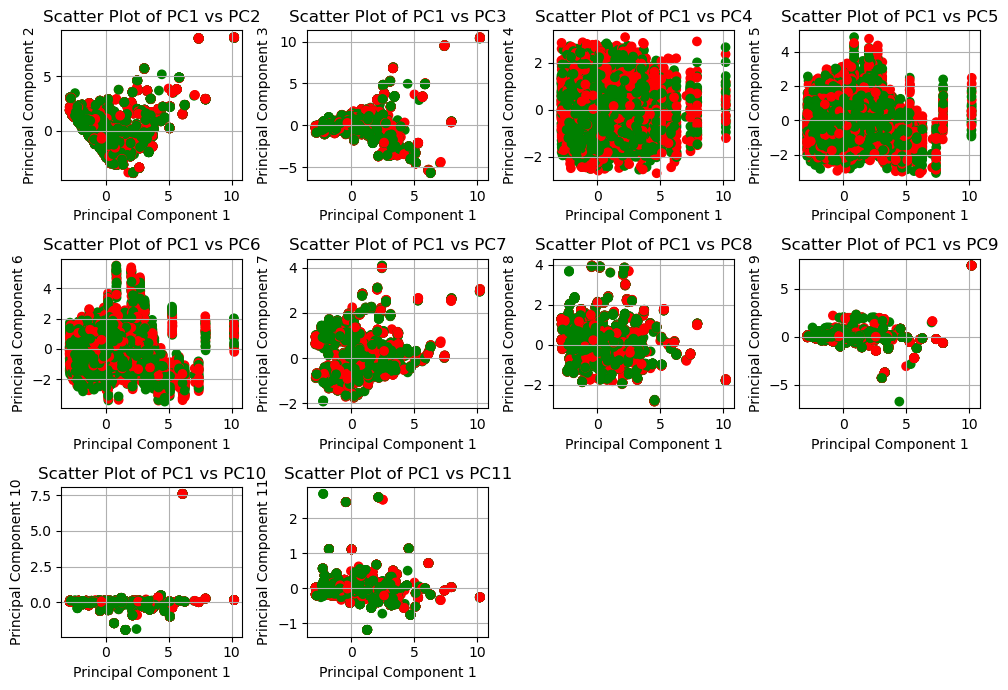

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/Liver Disease Prediction/Dataset/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# Preprocessing (similar to previous steps)
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 0, 'Female': 1})  # Convert Gender to numeric
data = data.dropna()  # Drop rows with missing values

data=data.drop_duplicates()
print(data.info())

# Select relevant features for PCA
features = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Liver Disease'] = data['Result']  # Assuming 'Result' indicates liver disease status

# Plotting each principal component against PC1
num_components = X_pca.shape[1]

plt.figure(figsize=(10,7))
for i in range(1, num_components):
    plt.subplot(3, (num_components - 1) // 3 + 1, i)
    plt.scatter(pca_df['PC1'], pca_df[f'PC{i+1}'], c=np.where(pca_df['Liver Disease'] == 1, 'red', 'green'), alpha=1)
    plt.title(f'Scatter Plot of PC1 vs PC{i+1}')
    plt.xlabel('Principal Component 1')
    plt.ylabel(f'Principal Component {i+1}')
    plt.grid()

plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  float64
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(10), int6

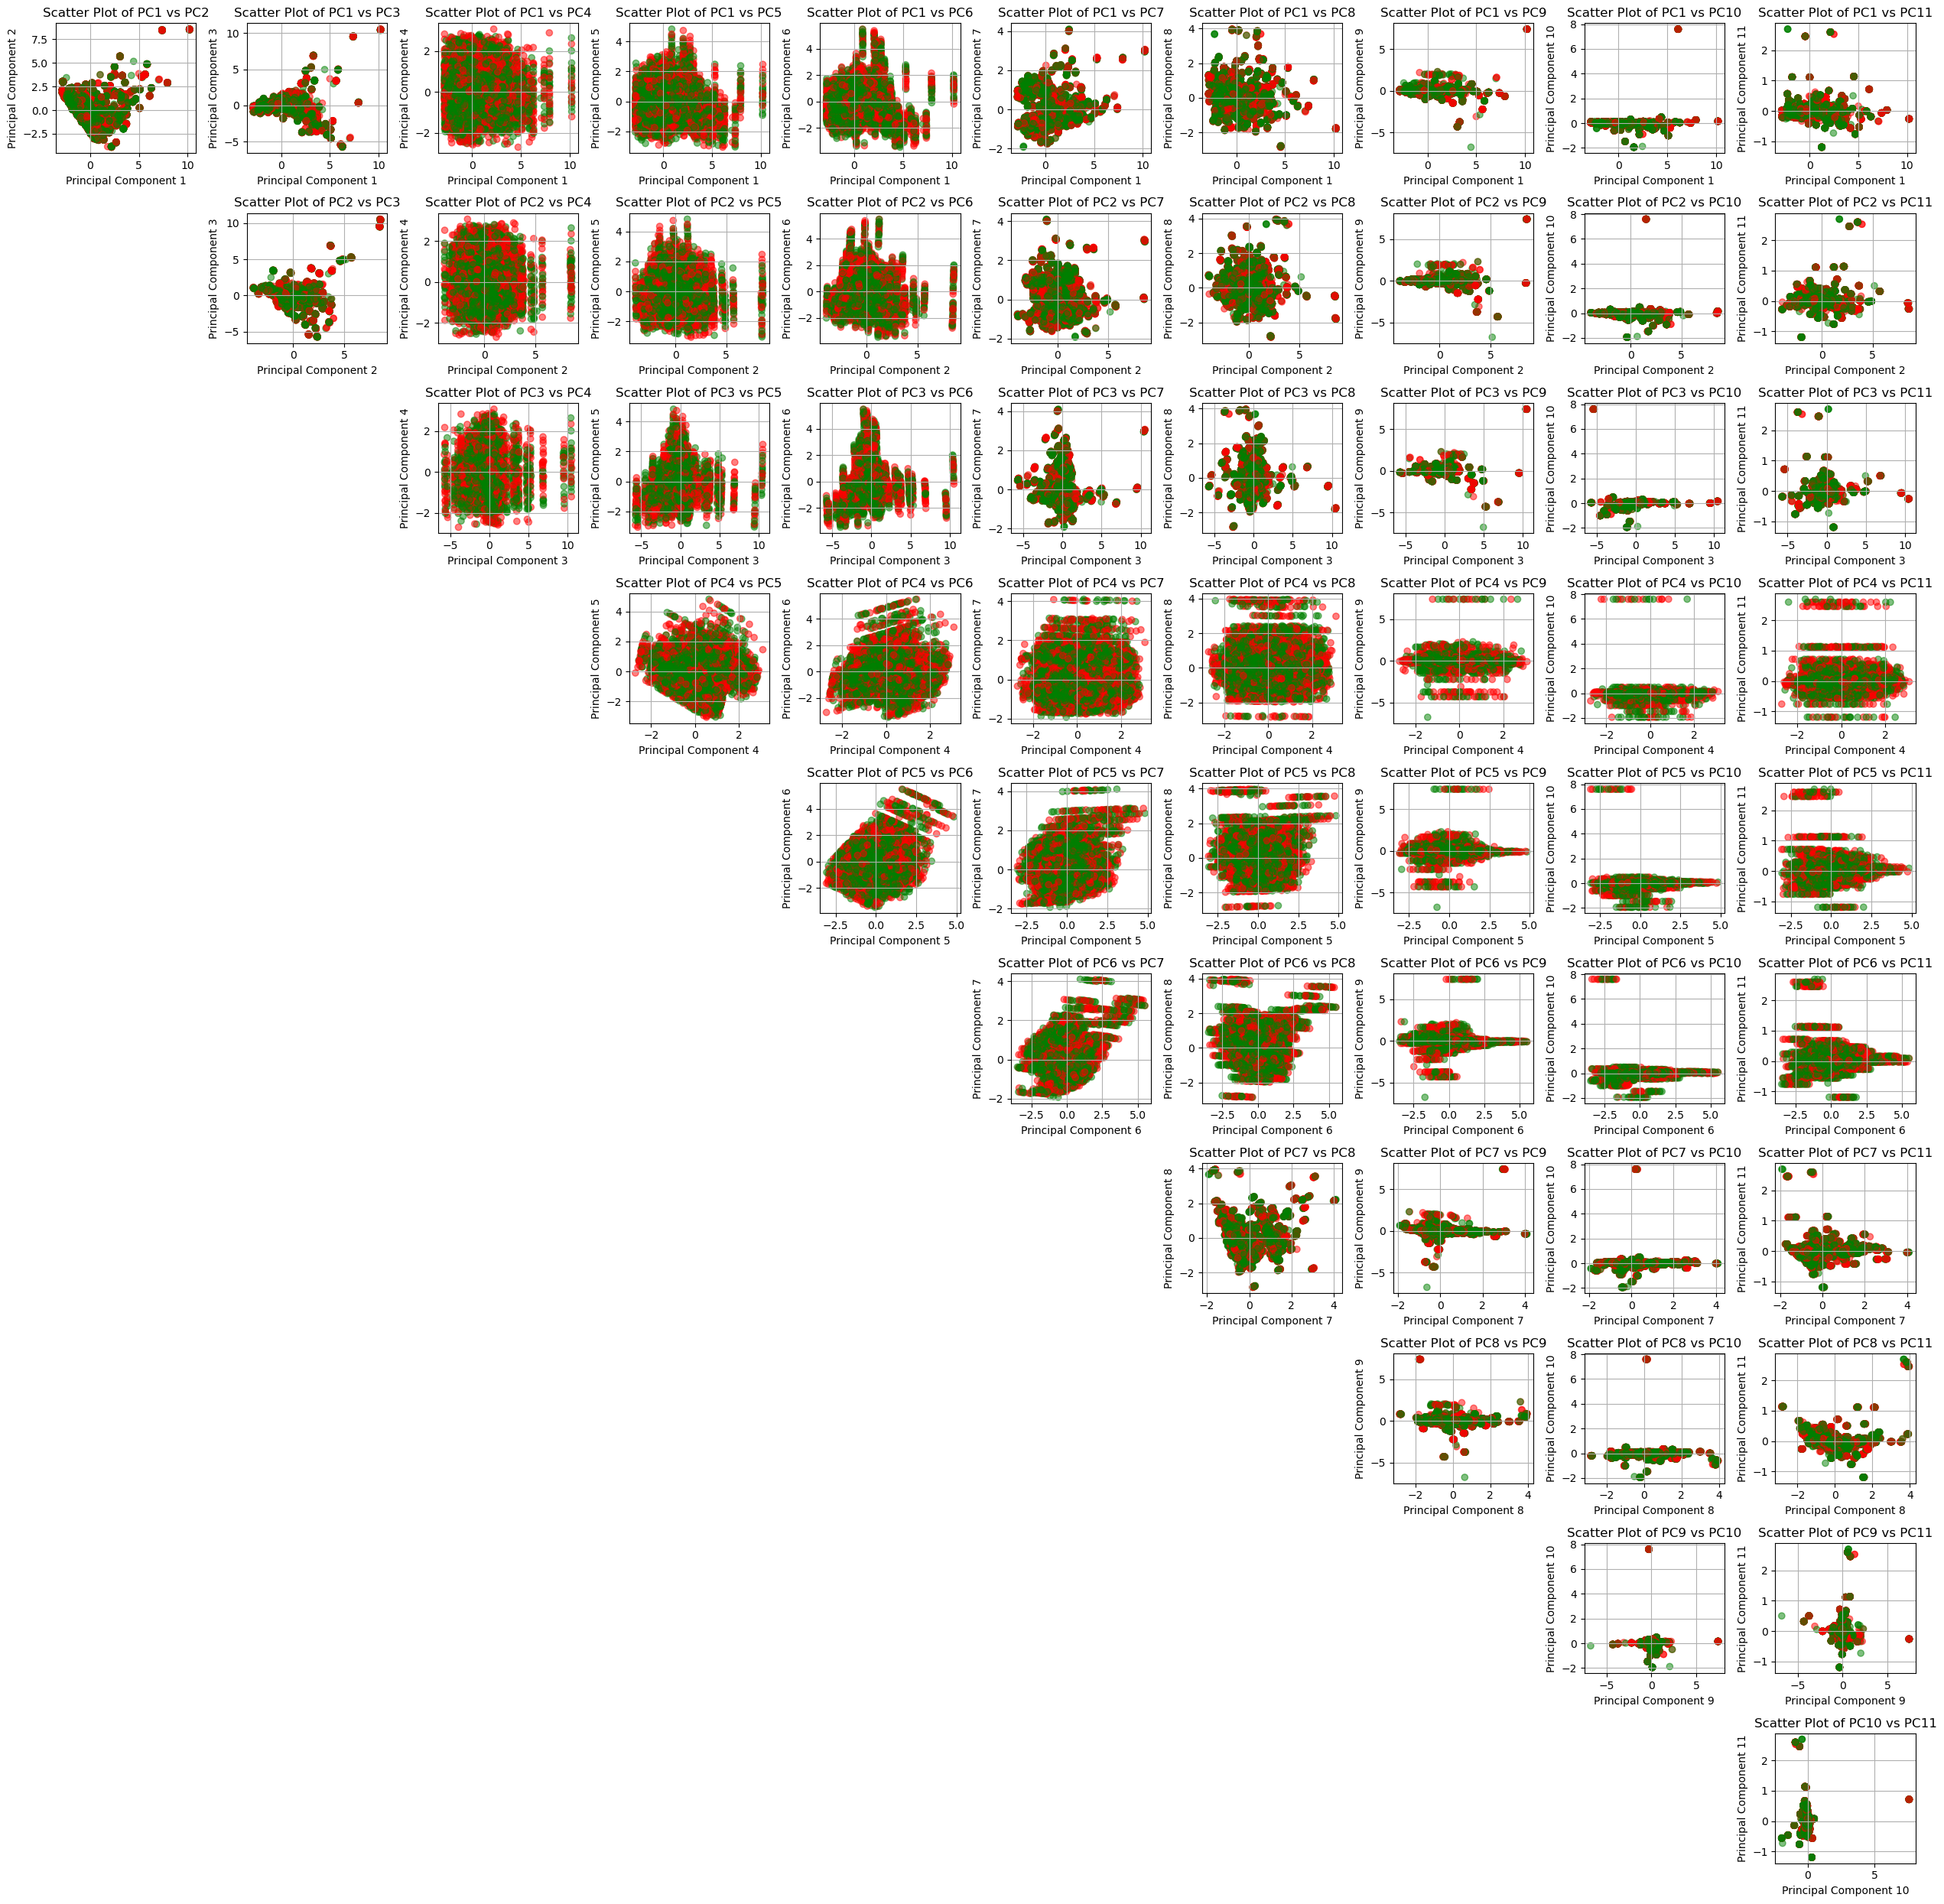

NameError: name 'selector' is not defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/Liver Disease Prediction/Dataset/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# Preprocessing (similar to previous steps)
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 0, 'Female': 1})  # Convert Gender to numeric
data = data.dropna()  # Drop rows with missing values

data=data.drop_duplicates()
print(data.info())

# Select relevant features for PCA
features = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Liver Disease'] = data['Result']  # Assuming 'Result' indicates liver disease status

# Plotting every combination of principal components
num_components = X_pca.shape[1]
plt.figure(figsize=(25,25))  # Increase figure size for better visibility

for i in range(num_components):
    for j in range(i + 1, num_components):
        plt.subplot(num_components - 1, num_components - 1, i * (num_components - 1) + j)
        plt.scatter(pca_df[f'PC{i+1}'], pca_df[f'PC{j+1}'], 
                    c=np.where(pca_df['Liver Disease'] == 1, 'red', 'green'), alpha=0.5)
        plt.title(f'Scatter Plot of PC{i+1} vs PC{j+1}')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.grid()

plt.tight_layout()
plt.show()



<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    16389 non-null  float64
 1   Gender of the patient                 16389 non-null  float64
 2   Total Bilirubin                       16389 non-null  float64
 3   Direct Bilirubin                      16389 non-null  float64
 4    Alkphos Alkaline Phosphotase         16389 non-null  float64
 5    Sgpt Alamine Aminotransferase        16389 non-null  float64
 6   Sgot Aspartate Aminotransferase       16389 non-null  float64
 7   Total Protiens                        16389 non-null  float64
 8    ALB Albumin                          16389 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  16389 non-null  float64
 10  Result                                16389 non-null  int64  
dtypes: float64(10), int6

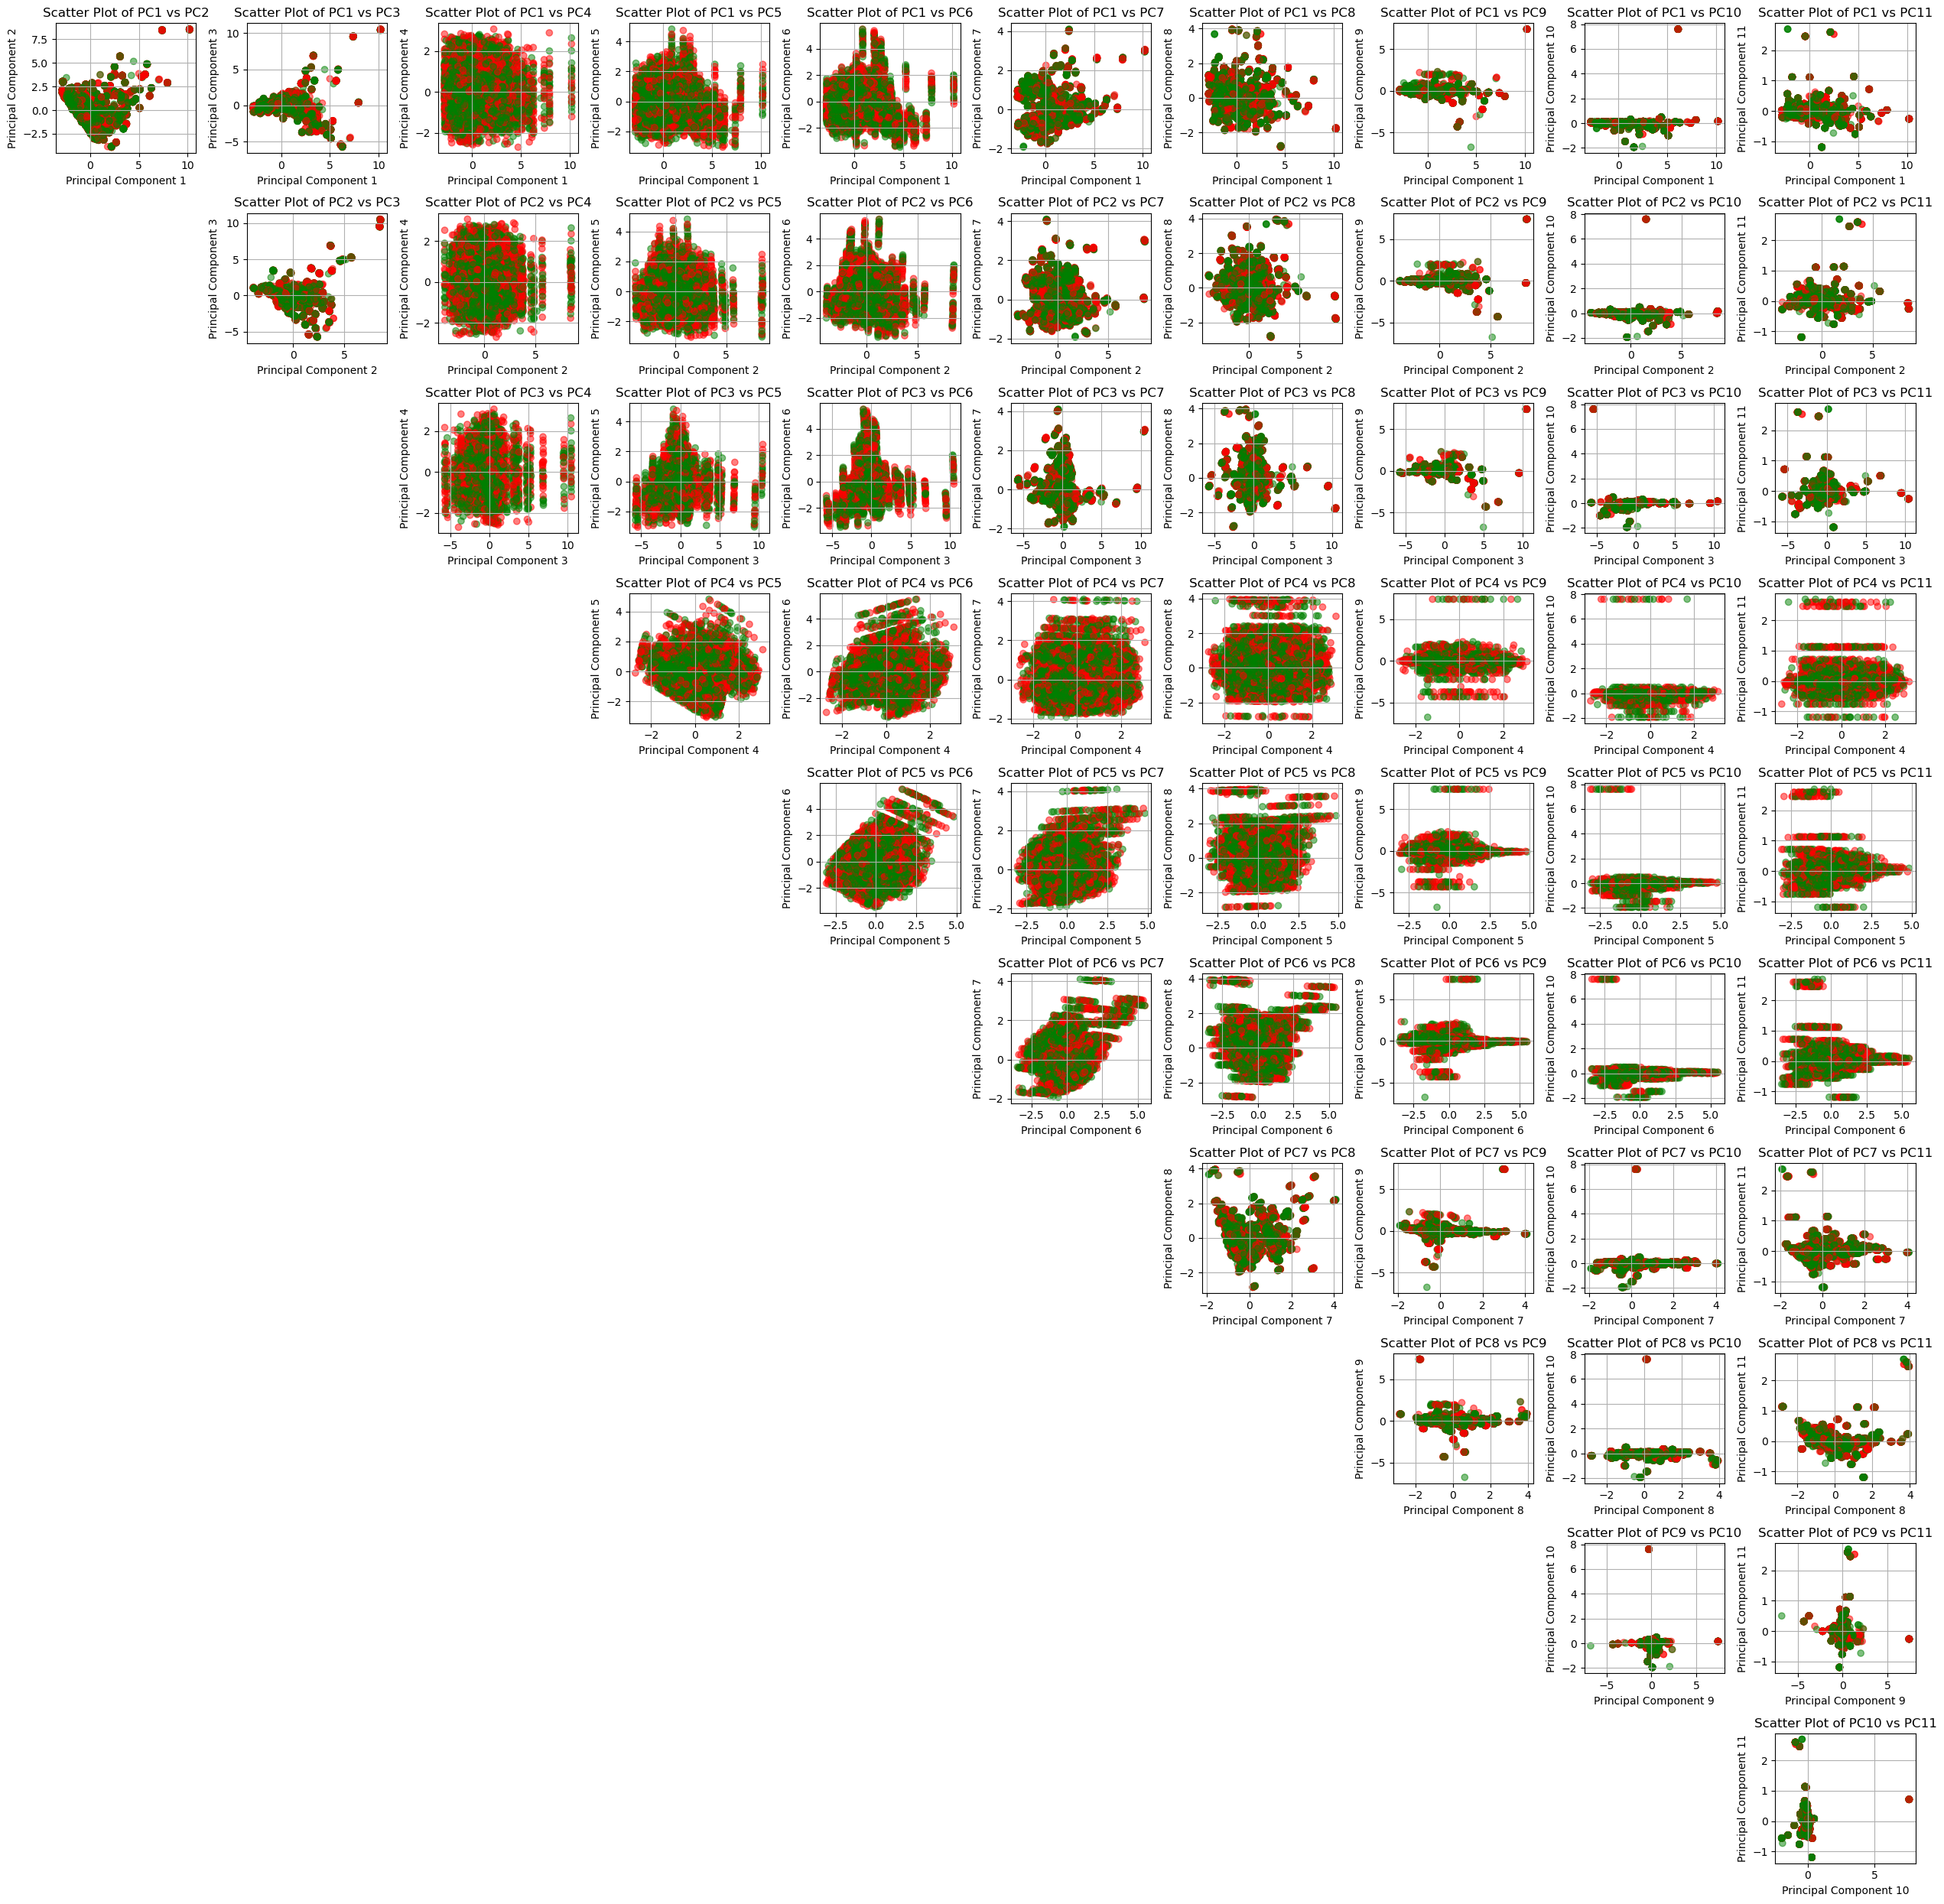

Feature Contributions to Principal Components:
                                           PC1       PC2       PC3       PC4  \
Age of the patient                    0.008124 -0.007974  0.033866 -0.700007   
Gender of the patient                -0.001044 -0.023742  0.018110  0.706658   
Total Bilirubin                       0.432202  0.205849 -0.428154 -0.028929   
Direct Bilirubin                      0.437337  0.214343 -0.422020 -0.023230   
 Alkphos Alkaline Phosphotase         0.251971  0.027921 -0.076704  0.083401   
 Sgpt Alamine Aminotransferase        0.285280  0.377755  0.526608  0.004912   
Sgot Aspartate Aminotransferase       0.317535  0.358084  0.497865  0.009071   
Total Protiens                       -0.225182  0.491295 -0.293165  0.025923   
 ALB Albumin                         -0.388622  0.513482 -0.115704  0.011660   
A/G Ratio Albumin and Globulin Ratio -0.328248  0.360331  0.035038 -0.017279   
Result                               -0.258239 -0.066937  0.074019 -0.032

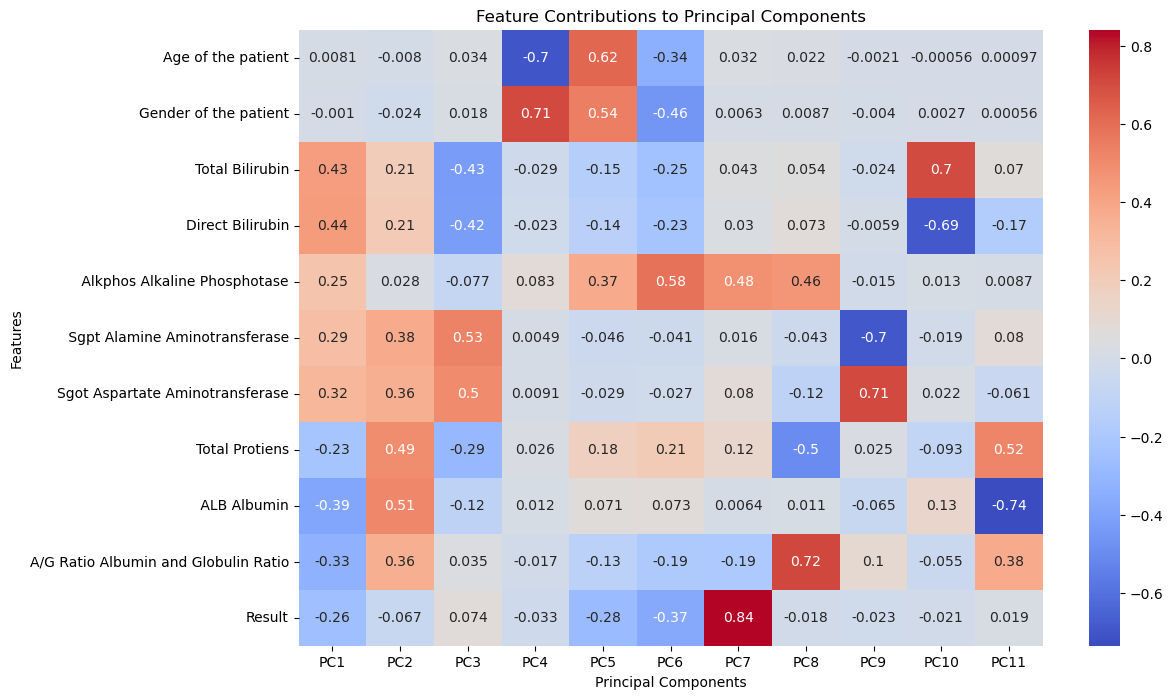

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/Liver Disease Prediction/Dataset/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# Preprocessing (similar to previous steps)
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 0, 'Female': 1})  # Convert Gender to numeric
data = data.dropna()  # Drop rows with missing values
data = data.drop_duplicates()
print(data.info())

# Select relevant features for PCA
features = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 
            '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 
            'Sgot Aspartate Aminotransferase', 'Total Protiens', 
            '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']

X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Liver Disease'] = data['Result']  # Assuming 'Result' indicates liver disease status

# Plotting every combination of principal components
num_components = X_pca.shape[1]
plt.figure(figsize=(25, 25))  # Increase figure size for better visibility

for i in range(num_components):
    for j in range(i + 1, num_components):
        plt.subplot(num_components - 1, num_components - 1, i * (num_components - 1) + j)
        plt.scatter(pca_df[f'PC{i+1}'], pca_df[f'PC{j+1}'], 
                    c=np.where(pca_df['Liver Disease'] == 1, 'red', 'green'), alpha=0.5)
        plt.title(f'Scatter Plot of PC{i+1} vs PC{j+1}')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.grid()

plt.tight_layout()
plt.show()

# Calculate feature contributions to principal components (Loadings)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=features)
print("Feature Contributions to Principal Components:")
print(loadings)

# Optional: Visualize Loadings using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Feature Contributions to Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


First few rows of the dataset:
   Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                

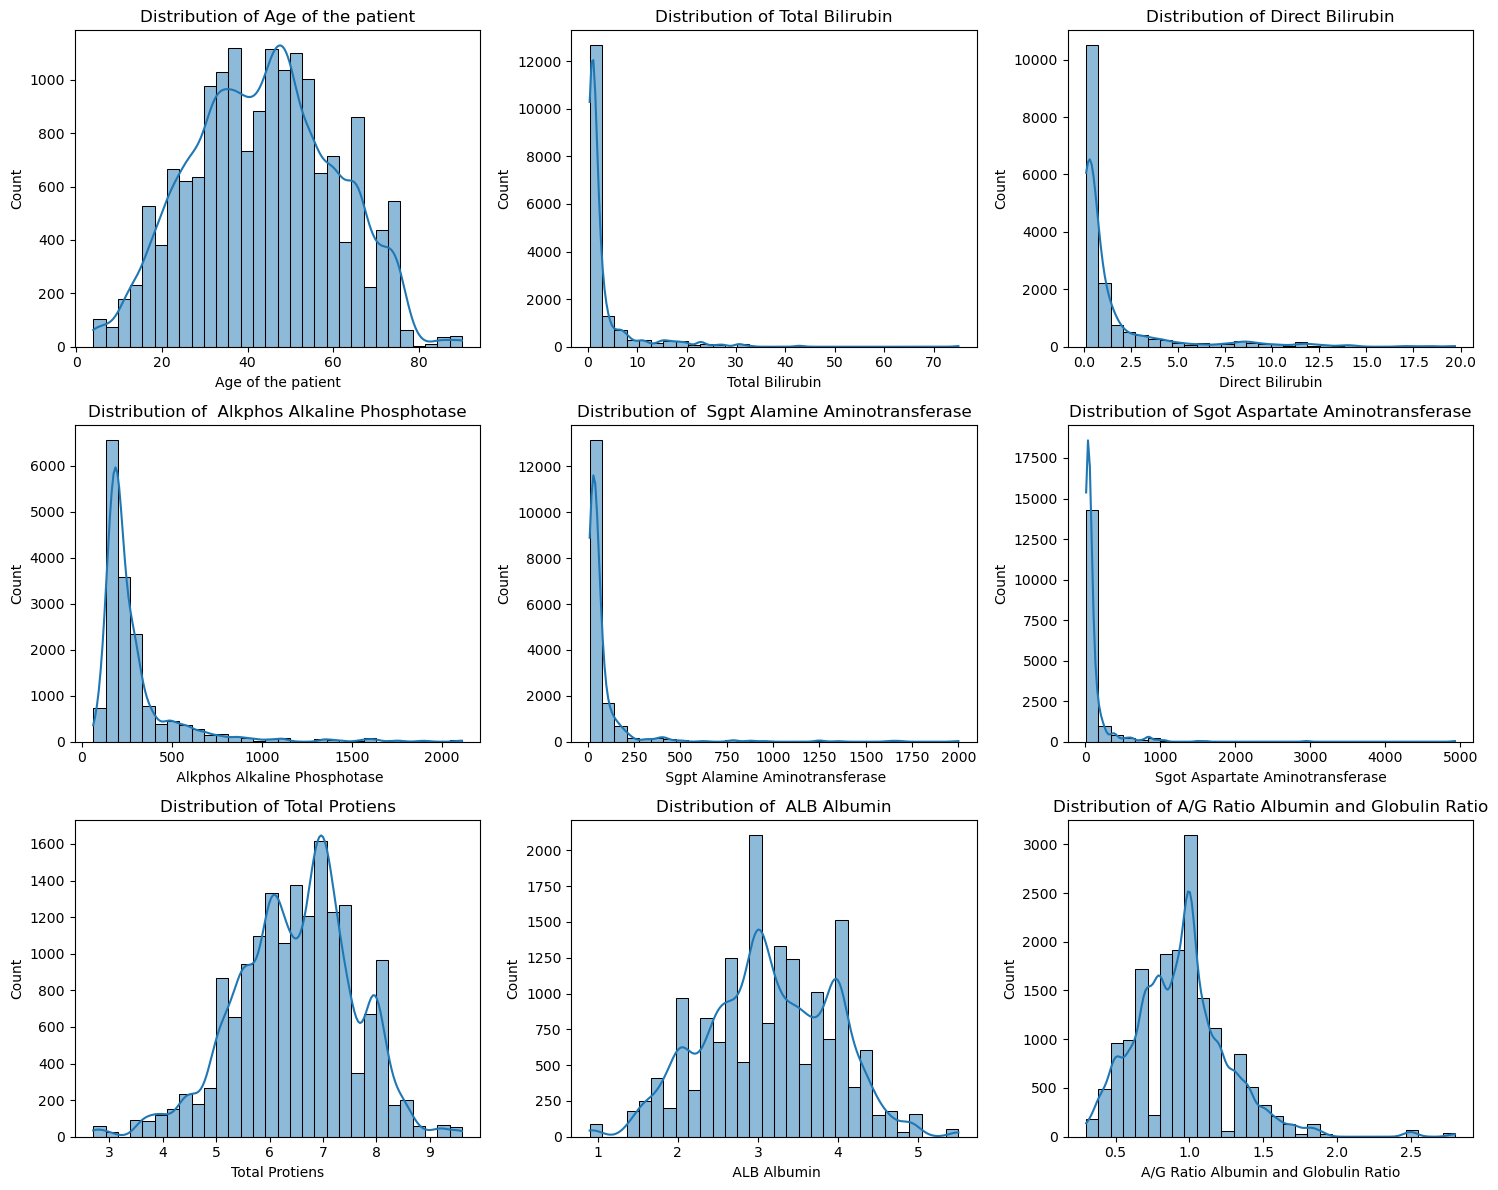

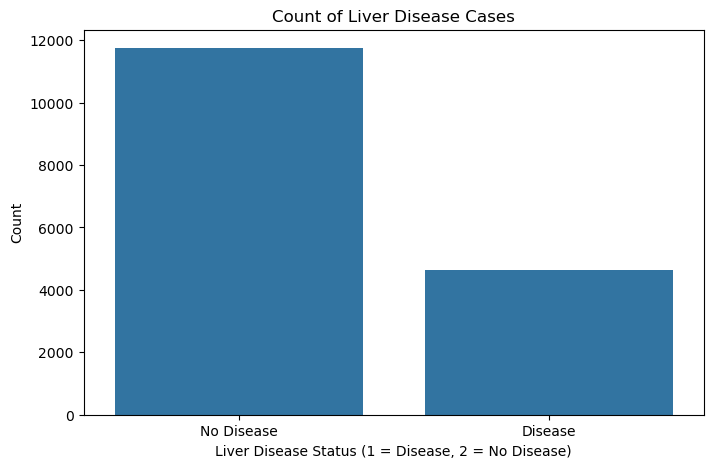

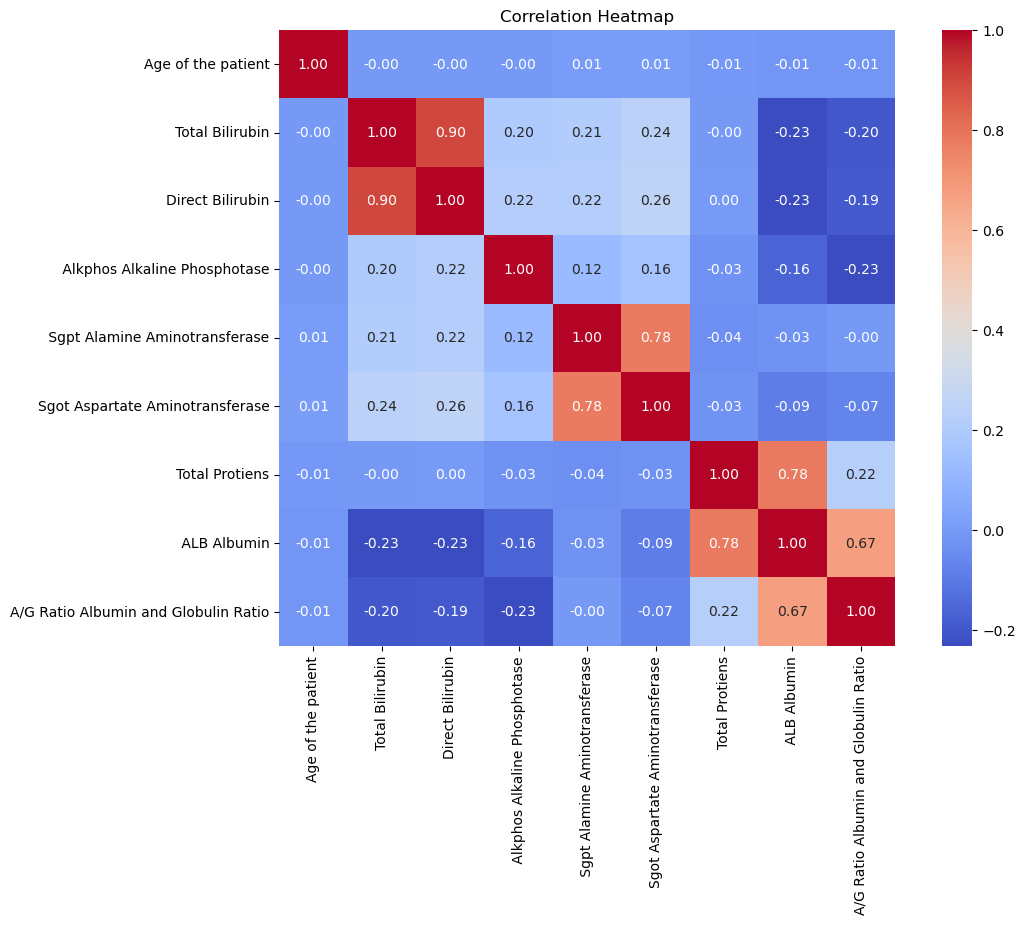

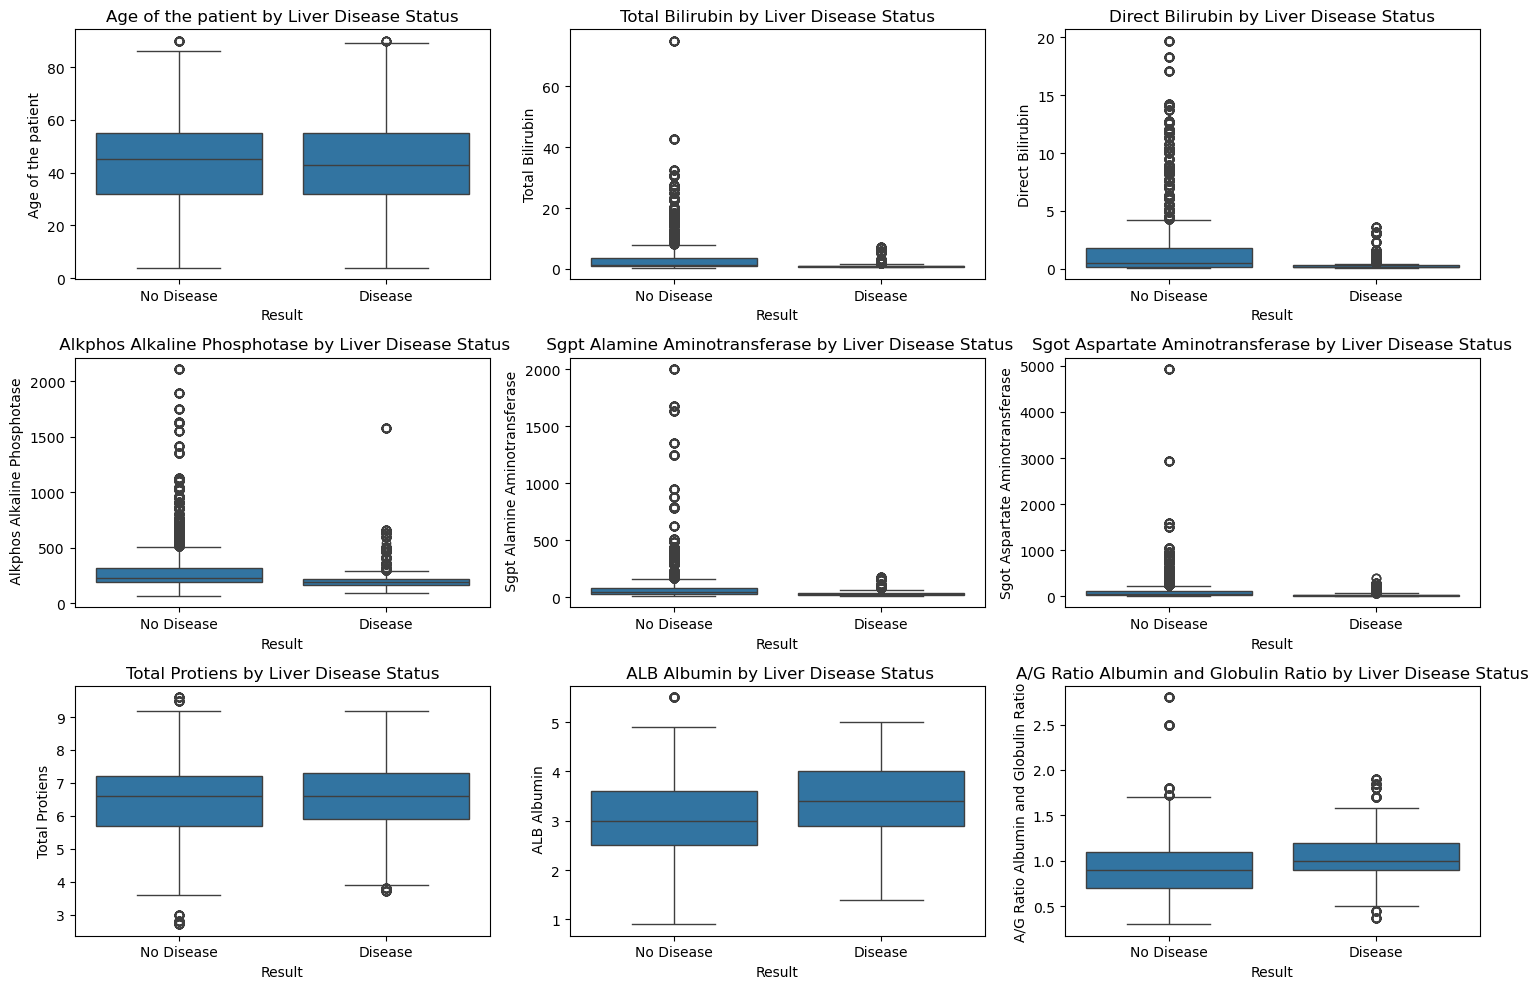

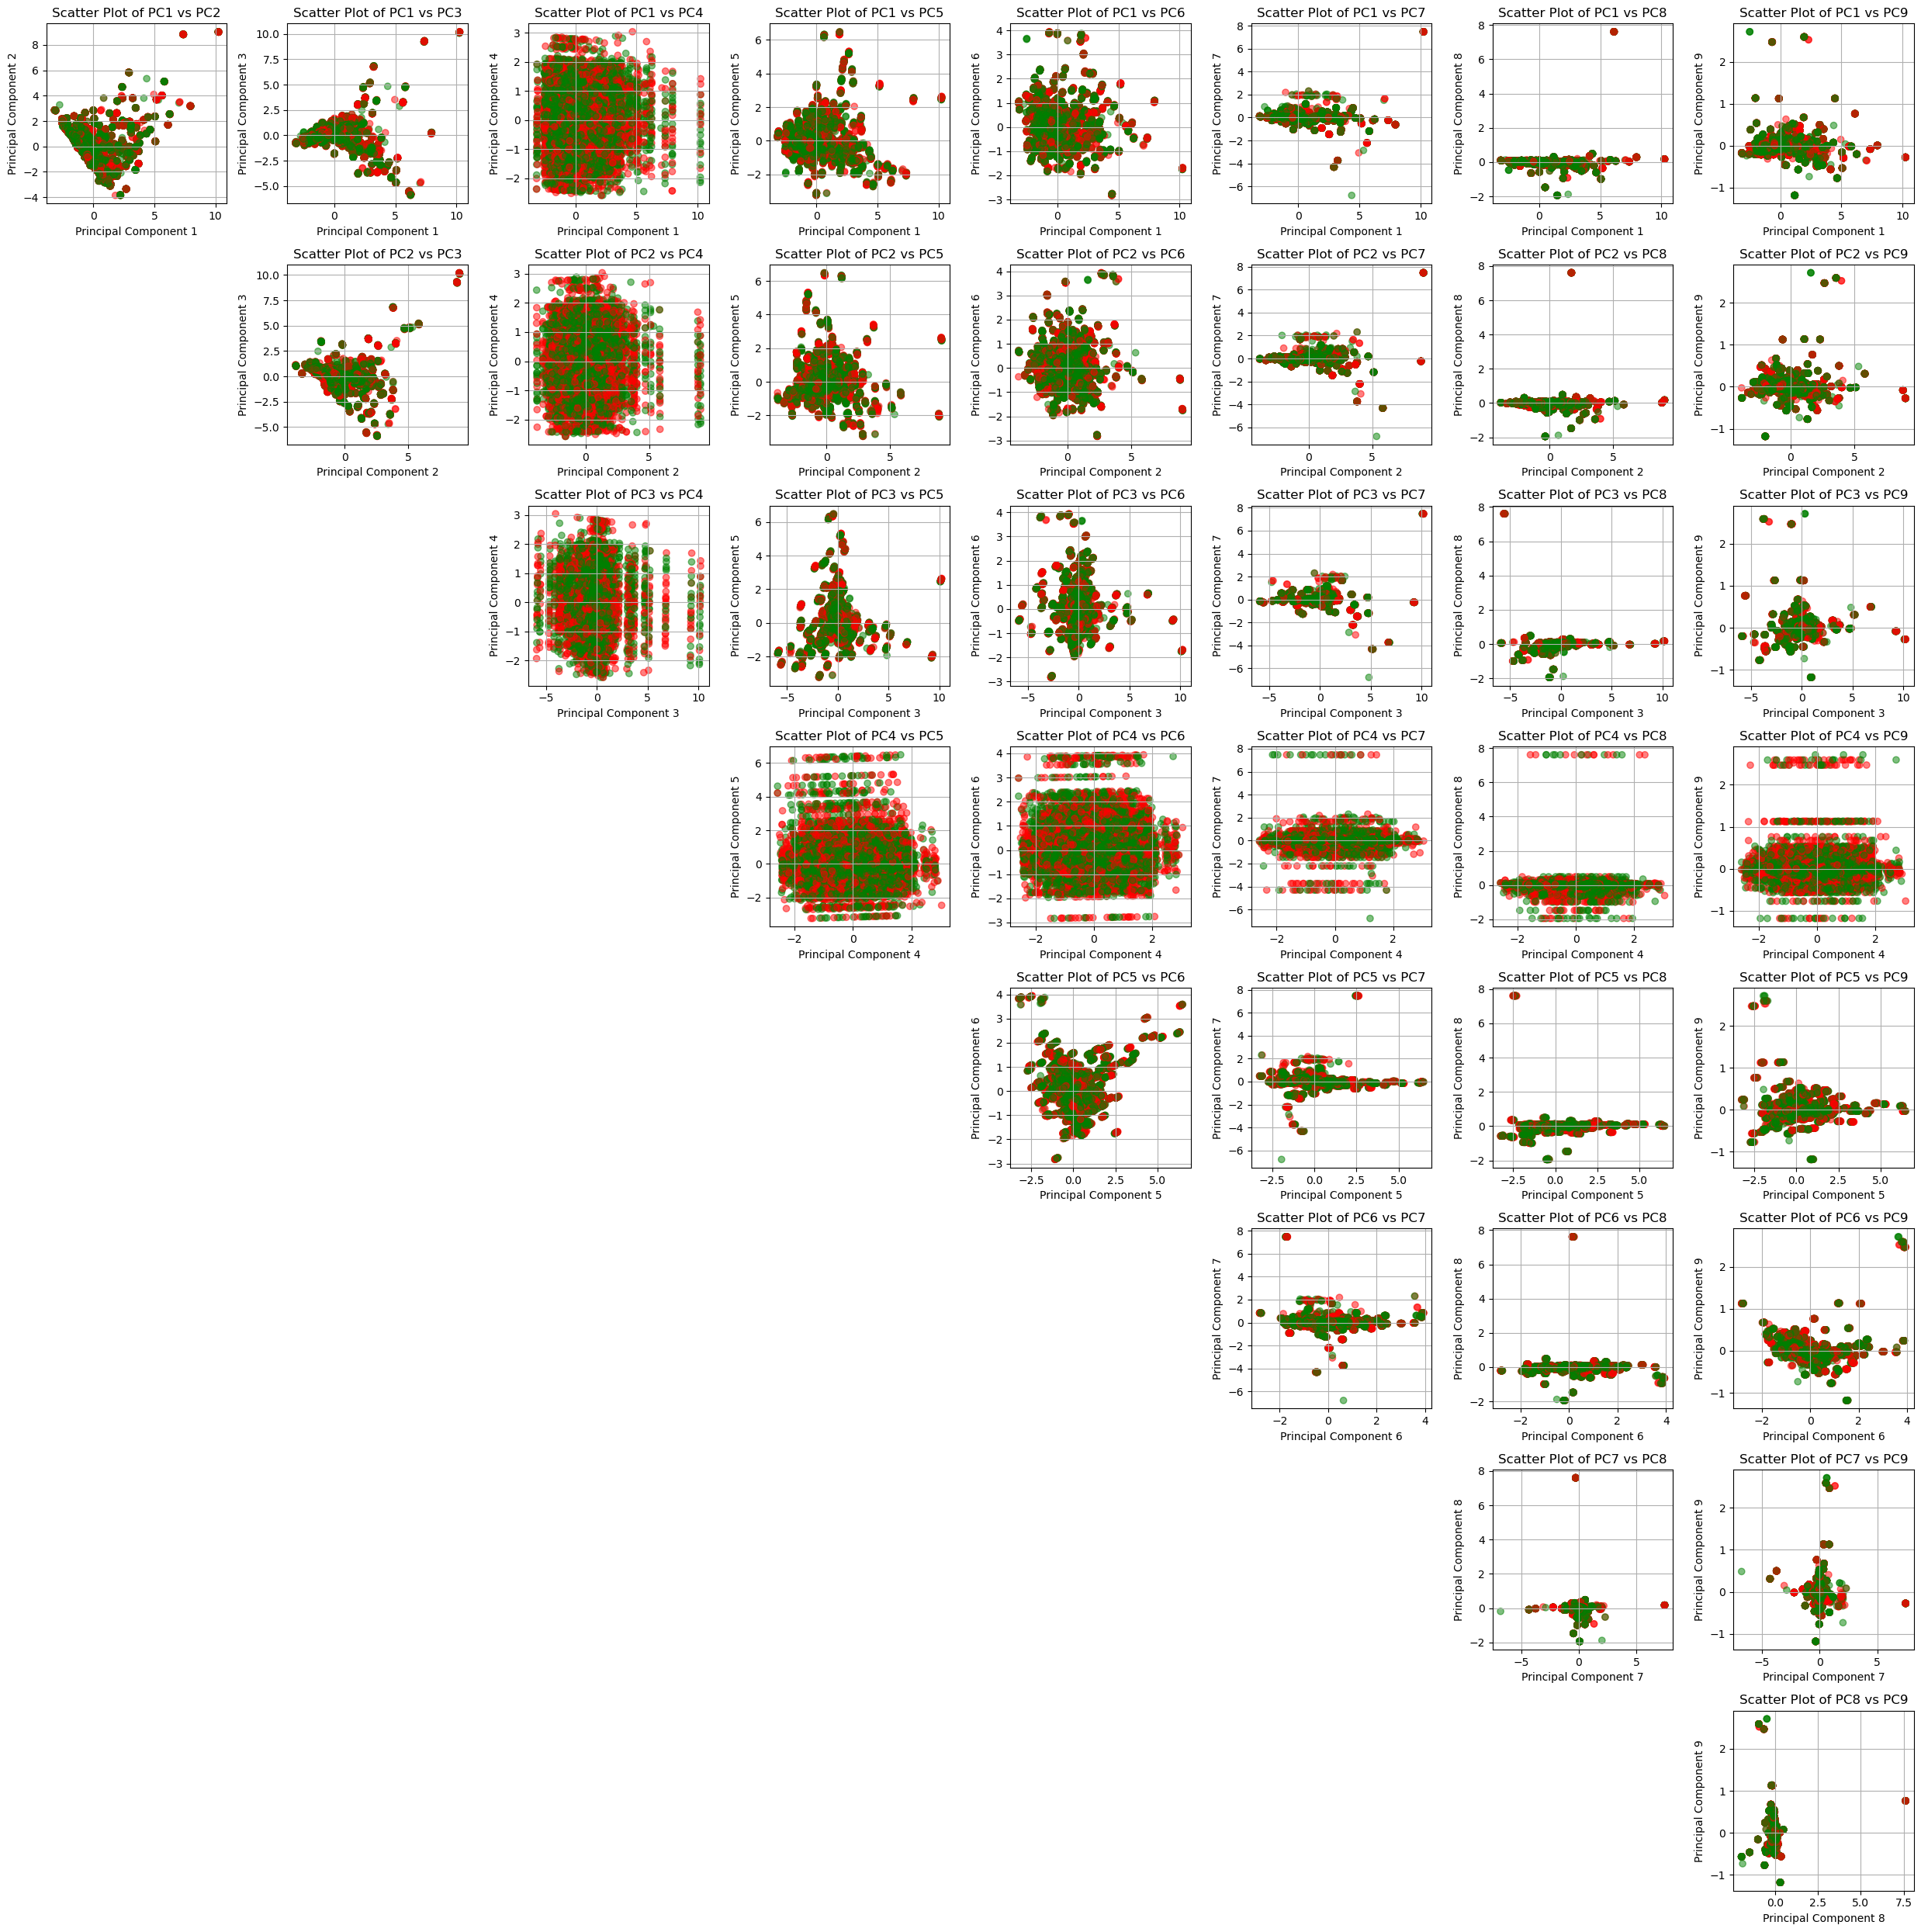

Feature Contributions to Principal Components:
                                           PC1       PC2       PC3       PC4  \
Age of the patient                    0.008203 -0.008305  0.035652  0.997519   
Total Bilirubin                       0.441933  0.224083 -0.447446  0.025715   
Direct Bilirubin                      0.445104  0.232050 -0.440228  0.023689   
 Alkphos Alkaline Phosphotase         0.251765  0.034492 -0.074887 -0.056063   
 Sgpt Alamine Aminotransferase        0.289042  0.393642  0.516128 -0.015487   
Sgot Aspartate Aminotransferase       0.324643  0.376027  0.485469 -0.013246   
Total Protiens                       -0.250826  0.479126 -0.288914  0.009884   
 ALB Albumin                         -0.414744  0.497298 -0.110439  0.006809   
A/G Ratio Albumin and Globulin Ratio -0.345341  0.348516  0.037090  0.005493   

                                           PC5       PC6       PC7       PC8  \
Age of the patient                    0.055423  0.021719 -0.001821 -0.00

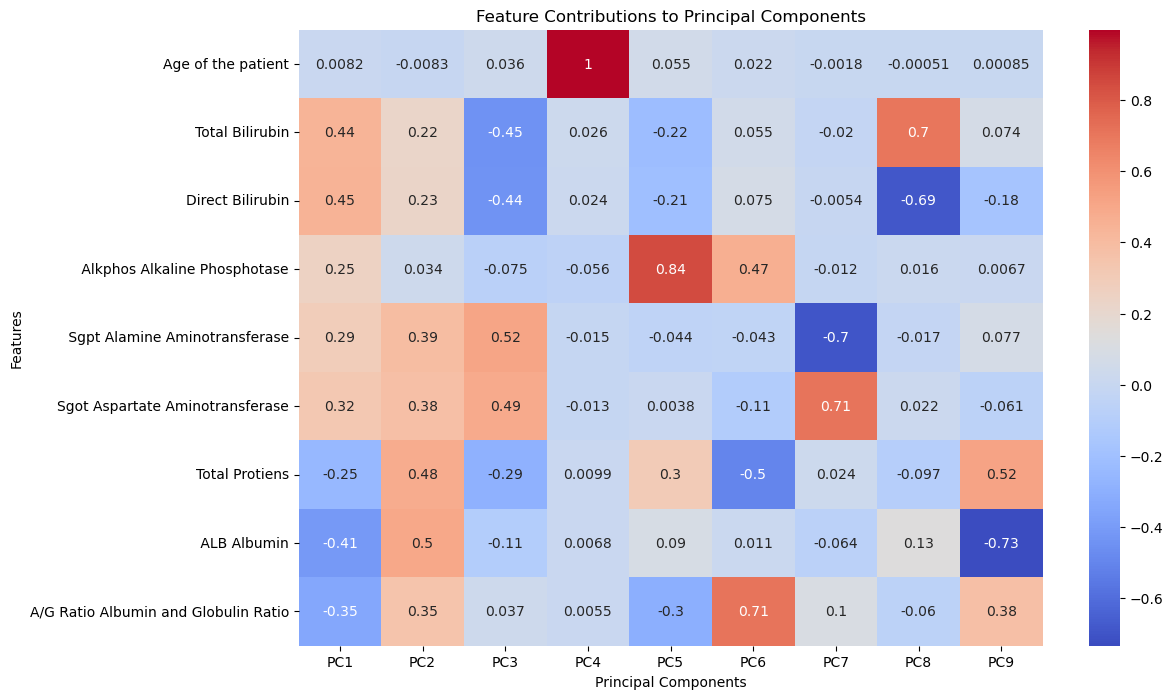

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('C:/Users/adhar/Jupiter notebook/Python/Data Analsis/Data-analysis/Liver Disease Prediction/Dataset/Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# Step 1: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Step 2: Basic information about the dataset
print("\nBasic Information:")
print(data.info())

# Step 3: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Step 4: Drop duplicates
data = data.drop_duplicates()

# Step 5: Summary statistics of numerical features
print("\nSummary Statistics:")
print(data.describe())

# Step 6: Convert Gender to numeric and drop rows with missing values
data['Gender of the patient'] = data['Gender of the patient'].map({'Male': 0, 'Female': 1})  # Convert Gender to numeric
data = data.dropna()  # Drop rows with missing values

# Step 7: Visualize distributions of numerical features
numerical_features = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 
                     '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 
                     'Sgot Aspartate Aminotransferase', 'Total Protiens', 
                     '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Step 8: Visualize count of liver disease cases
plt.figure(figsize=(8, 5))
sns.countplot(x='Result', data=data)
plt.title('Count of Liver Disease Cases')
plt.xlabel('Liver Disease Status (1 = Disease, 2 = No Disease)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

# Step 9: Correlation heatmap for numerical features
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Step 10: Boxplots to visualize distributions across gender and liver disease status
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Result', y=feature, data=data)
    plt.title(f'{feature} by Liver Disease Status')
    plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

# Step 11: Prepare data for PCA
X = data[numerical_features]  # Use numerical features for PCA

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Liver Disease'] = data['Result']  # Assuming 'Result' indicates liver disease status

# Plotting every combination of principal components
num_components = X_pca.shape[1]
plt.figure(figsize=(25, 25))  # Increase figure size for better visibility

for i in range(num_components):
    for j in range(i + 1, num_components):
        plt.subplot(num_components - 1, num_components - 1, i * (num_components - 1) + j)
        plt.scatter(pca_df[f'PC{i+1}'], pca_df[f'PC{j+1}'], 
                    c=np.where(pca_df['Liver Disease'] == 1, 'red', 'green'), alpha=0.5)
        plt.title(f'Scatter Plot of PC{i+1} vs PC{j+1}')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.grid()

plt.tight_layout()
plt.show()

# Calculate feature contributions to principal components (Loadings)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=numerical_features)
print("Feature Contributions to Principal Components:")
print(loadings)

# Optional: Visualize Loadings using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Feature Contributions to Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()
